In [12]:
%matplotlib inline
!pip install scikit-learn
!pip install seaborn
!pip install geopandas matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from glob import glob
import geopandas as gpd

from scipy.spatial import distance_matrix
from sklearn.preprocessing import MinMaxScaler

# Para no mostrar 'Future Warnings' producto de que algunos paquetes aún
# trabajan con versiones no actualizadas de otros paquetes
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [13]:
DATOS_generales = pd.read_csv('./datos_proyecto_productos_filtrados.csv')
DATOS_generales['Buyer'].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 3950 entries, Clarisse Horan (clarissehoran) to Nancy (jgcu1slfmju6k9s7)
Series name: Buyer
Non-Null Count  Dtype
--------------  -----
3950 non-null   int64
dtypes: int64(1)
memory usage: 61.7+ KB


In [14]:
DATOS_generales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6373 entries, 0 to 6372
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sale Date        6373 non-null   object 
 1   Item Name        6372 non-null   object 
 2   Buyer            5559 non-null   object 
 3   Quantity         6373 non-null   int64  
 4   Price            6373 non-null   float64
 5   Discount Amount  6373 non-null   float64
 6   Ship City        6373 non-null   object 
 7   Ship Country     6373 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 398.4+ KB


In [15]:
frecuencia_valores = DATOS_generales['Buyer'].value_counts()
compradores_recurrentes = DATOS_generales[DATOS_generales['Buyer'].isin(frecuencia_valores[frecuencia_valores > 1].index)]
compradores_recurrentes['Buyer'].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 784 entries, Clarisse Horan (clarissehoran) to savanna castillo (xwaoijkqje8ws8s3)
Series name: Buyer
Non-Null Count  Dtype
--------------  -----
784 non-null    int64
dtypes: int64(1)
memory usage: 12.2+ KB


In [16]:
frecuencia_valores = DATOS_generales['Buyer'].value_counts()
compradores_sin_iniciar = DATOS_generales[DATOS_generales['Buyer'].isna()]
compradores_sin_iniciar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 6361
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sale Date        814 non-null    object 
 1   Item Name        814 non-null    object 
 2   Buyer            0 non-null      object 
 3   Quantity         814 non-null    int64  
 4   Price            814 non-null    float64
 5   Discount Amount  814 non-null    float64
 6   Ship City        814 non-null    object 
 7   Ship Country     814 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 57.2+ KB


In [17]:
frecuencia_valores = DATOS_generales['Buyer'].value_counts()
compradores_unicos = DATOS_generales[DATOS_generales['Buyer'].isin(frecuencia_valores[frecuencia_valores == 1].index)]
compradores_unicos['Buyer'].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 3166 entries, olivia poole (eynmxeca) to Nancy (jgcu1slfmju6k9s7)
Series name: Buyer
Non-Null Count  Dtype
--------------  -----
3166 non-null   int64
dtypes: int64(1)
memory usage: 49.5+ KB


In [18]:
suma_ventas_recurrentes = compradores_recurrentes['Price'].sum()
suma_cantidades_recurrentes = compradores_recurrentes['Quantity'].sum()
suma_ventas_unicas = compradores_unicos['Price'].sum()
suma_cantidades_unicas = compradores_unicos['Quantity'].sum()
suma_ventas_sin_iniciar = compradores_sin_iniciar['Price'].sum()
suma_cantidades_sin_iniciar = compradores_sin_iniciar['Quantity'].sum()
suma_ventas_totales = DATOS_generales['Price'].sum()
suma_cantidades_totales = DATOS_generales['Quantity'].sum()
print(((suma_ventas_recurrentes,suma_ventas_unicas, suma_ventas_sin_iniciar)
       ,(suma_cantidades_recurrentes,suma_cantidades_unicas, suma_cantidades_sin_iniciar)))

((12562.75, 25521.3, 5955.4), (2663, 3443, 901))


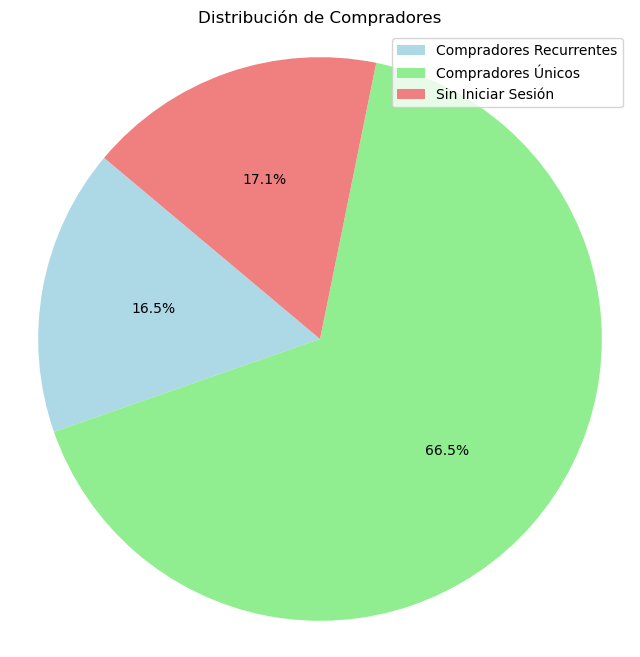

In [19]:
# Datos
frecuencia_valores = DATOS_generales['Buyer'].value_counts()
compradores_recurrentes = frecuencia_valores[frecuencia_valores > 1].count()
compradores_unicos = frecuencia_valores[frecuencia_valores == 1].count()
compradores_sin_iniciar = DATOS_generales['Buyer'].isna().sum()

# Etiquetas y porcentajes
etiquetas = ['Compradores Recurrentes', 'Compradores Únicos', 'Sin Iniciar Sesión']
porcentajes = [compradores_recurrentes, compradores_unicos, compradores_sin_iniciar]

# Colores
colores = ['lightblue', 'lightgreen', 'lightcoral']

# Crear la gráfica de tarta
fig, ax = plt.subplots(figsize=(8, 8))
patches, _, _ = ax.pie(porcentajes, colors=colores, startangle=140, autopct='%1.1f%%')

# Añadir etiquetas
ax.legend(patches, etiquetas, loc="best")

# Añadir título
ax.set_title('Distribución de Compradores')

# Eliminar el fondo fuera del gráfico
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Guardar la gráfica
plt.savefig('grafico_tipo_comprador.png', transparent=True)

# Mostrar la gráfica
plt.axis('equal')  # Aspecto de círculo
plt.show()

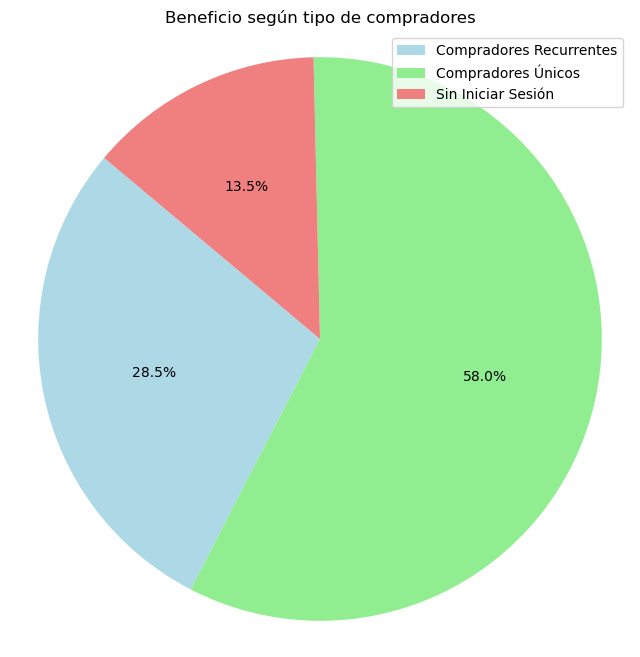

In [21]:
# Datos
frecuencia_valores = DATOS_generales['Buyer'].value_counts()
compradores_recurrentes = frecuencia_valores[frecuencia_valores > 1].count()
compradores_unicos = frecuencia_valores[frecuencia_valores == 1].count()
compradores_sin_iniciar = DATOS_generales['Buyer'].isna().sum()

# Etiquetas y porcentajes
etiquetas = ['Compradores Recurrentes', 'Compradores Únicos', 'Sin Iniciar Sesión']
porcentajes = [suma_ventas_recurrentes, suma_ventas_unicas, suma_ventas_sin_iniciar]

# Colores
colores = ['lightblue', 'lightgreen', 'lightcoral']

# Crear la gráfica de tarta
fig, ax = plt.subplots(figsize=(8, 8))
patches, _, _ = ax.pie(porcentajes, colors=colores, startangle=140, autopct='%1.1f%%')

# Añadir etiquetas
ax.legend(patches, etiquetas, loc="best")

# Añadir título
ax.set_title('Beneficio según tipo de compradores')

# Eliminar el fondo fuera del gráfico
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Guardar la gráfica
plt.savefig('grafico_beneficio_tipo_comprador.png', transparent=True)

# Mostrar la gráfica
plt.axis('equal')  # Aspecto de círculo
plt.show()